In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #Machine lEARNING Model preparation
from sklearn.utils import shuffle #For shuffling the Images data

In [ ]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

# Your Google Drive files are now accessible in '/content/drive/My Drive/'

# Specify the folder path where you want to upload the dataset
folder_path = '/content/drive/My Drive/datasets/'

# Upload the dataset to the specified folder in your Google Drive

Mounted at /content/drive


In [ ]:
# Replace 'your_uploaded_dataset.csv' with the actual filename of your dataset
uploaded_dataset_path = folder_path + 'A_Z Handwritten Data.csv'

# You can manually upload the dataset to this path via the Colab file explorer.

# Load the dataset from your Google Drive into a Pandas DataFrame
data = pd.read_csv(uploaded_dataset_path).astype('float32')

# Now 'data' contains the dataset as a Pandas DataFrame
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [ ]:
X = data.drop('0',axis = 1)
y = data['0'] #and put the 0 column in the label y

In [ ]:

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

#The below step  is to reshape the Image and Label data according to our requirement
#shape size would be [28,28]

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

y_int = np.int0(y)
count = np.zeros(26, dtype='int')
print(count)
for i in y_int:
   count[i] +=1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#We get the list named alphabets for the Comparision purpose
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
alphabets[2]

'C'

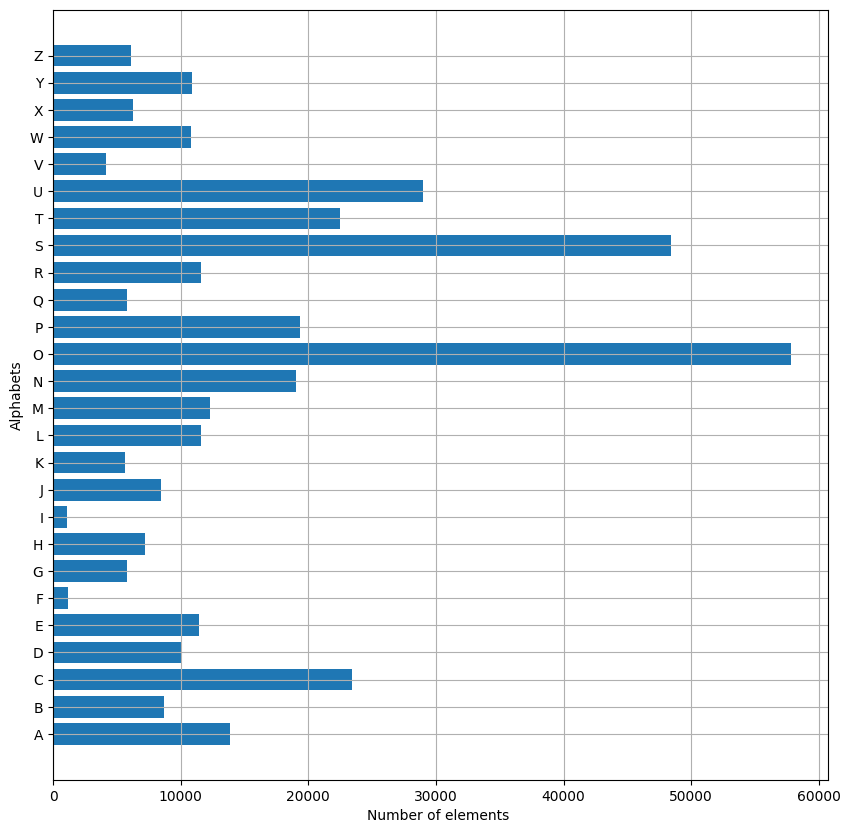

In [ ]:
#We are ploting the bar graph of size 10 , 10
#In which we can clearly see that Alphabets "o" frequency is greater than 50,000

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

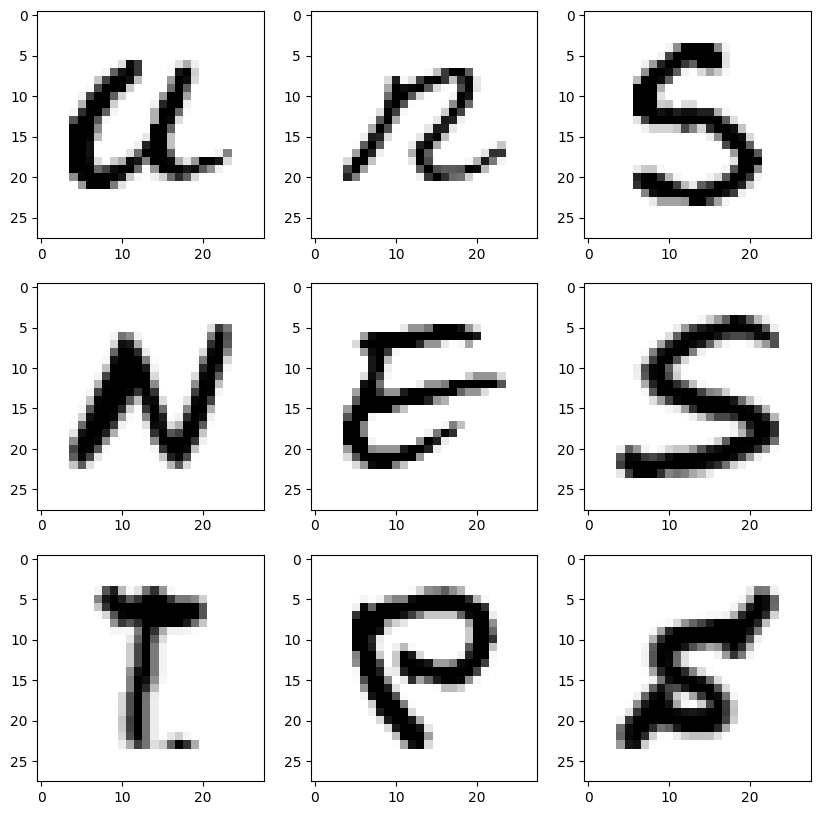

In [ ]:

shuff = shuffle(train_x[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
#Data Reshaping
#We changed the Images reshaping to "New shape of train data:  (297960, 28, 28, 1)"
#For both Train and Test data
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)

print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [ ]:
#Here we convert the single float values to categorical values.
#This is done as the CNN model takes input of labels & generates
#the output as a vector of probabilities.
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [ ]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k
import tensorflow

# Tensor Flow has different features and CNN is one of them. Its getting the data as a input
# Then its convolute the images with many different layers
# After Convoluation there are pooling layers
# The convolution layers are generally followed by maxpool layers that are used to reduce the
# number of features extracted and ultimately the output of the maxpool and layers
# and convolution layers are flattened into a vector of single dimension and are given as an
#input to the Dense layer
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [ ]:
model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))


Epoch 1/10
9312/9312 [==============================] - 491s 52ms/step - loss: 0.0547 - accuracy: 0.9877 - val_loss: 0.1098 - val_accuracy: 0.9774
Epoch 2/10
9312/9312 [==============================] - 451s 48ms/step - loss: 0.0559 - accuracy: 0.9874 - val_loss: 0.0880 - val_accuracy: 0.9840
Epoch 3/10
9312/9312 [==============================] - 466s 50ms/step - loss: 0.0541 - accuracy: 0.9881 - val_loss: 0.0935 - val_accuracy: 0.9825
Epoch 4/10
9312/9312 [==============================] - 455s 49ms/step - loss: 0.0550 - accuracy: 0.9878 - val_loss: 0.1475 - val_accuracy: 0.9803
Epoch 5/10
9312/9312 [==============================] - 443s 48ms/step - loss: 0.0529 - accuracy: 0.9882 - val_loss: 0.0761 - val_accuracy: 0.9859
Epoch 6/10
9312/9312 [==============================] - 457s 49ms/step - loss: 0.0589 - accuracy: 0.9876 - val_loss: 0.0945 - val_accuracy: 0.9846
Epoch 7/10
9312/9312 [==============================] - 452s 49ms/step - loss: 0.0611 - accuracy: 0.9873 - val_loss: 0

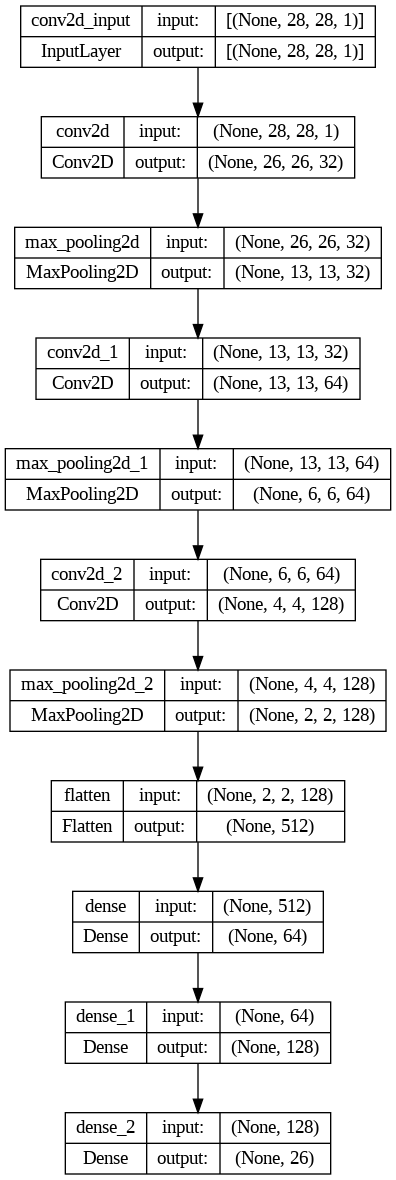

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Assuming 'model' is your TensorFlow Keras model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the generated image
Image('model_plot.png')


In [ ]:
#Here we will save the Model summar I am using my notebook in same folder So , I used the
#Same path for this but you can save it on your selected location
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Best Validation Accuracy: 98.58907461166382 (Epoch 5)


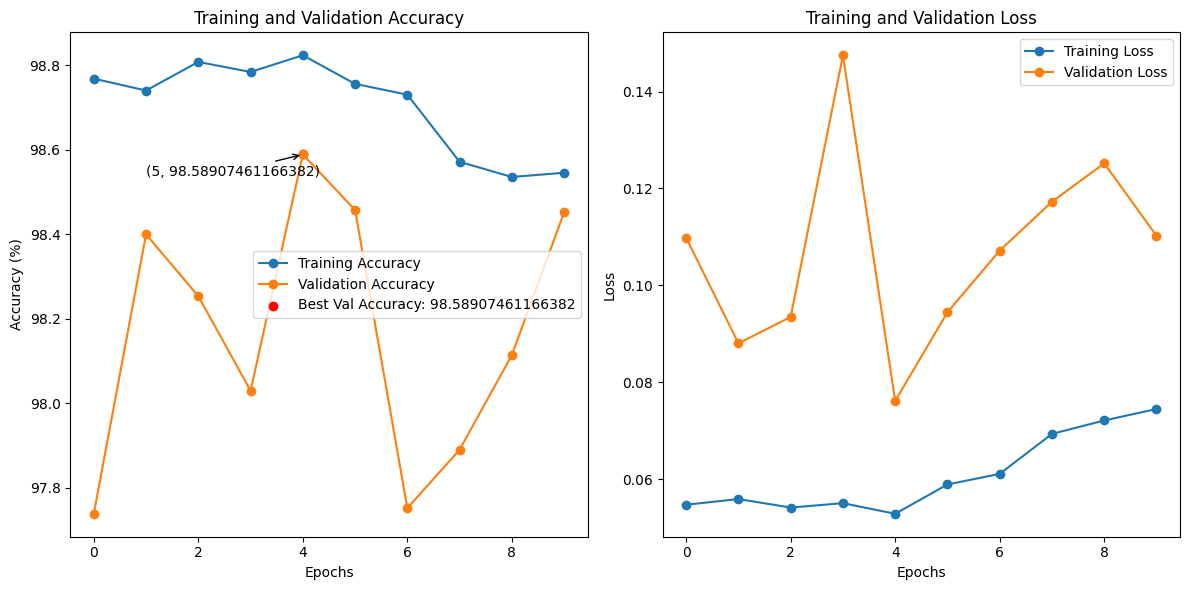

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the following variables defined:
# train_accuracy, val_accuracy, train_loss, val_loss

# Find the epoch with the maximum validation accuracy
best_val_acc_epoch = val_accuracy.index(max(val_accuracy))
best_val_acc = max(val_accuracy)

# Print the best validation accuracy and corresponding epoch
print(f"Best Validation Accuracy: {best_val_acc:} (Epoch {best_val_acc_epoch + 1})")

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o', linestyle='-')

# Annotate the point with the best validation accuracy
plt.scatter(best_val_acc_epoch, best_val_acc, color='red', label=f'Best Val Accuracy: {best_val_acc:}')
plt.annotate(f'({best_val_acc_epoch + 1}, {best_val_acc:})',
             xy=(best_val_acc_epoch, best_val_acc),
             xytext=(best_val_acc_epoch - 3, best_val_acc - 0.05),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(val_loss, label='Validation Loss', marker='o', linestyle='-')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Displaying the plots
plt.tight_layout()
plt.show()


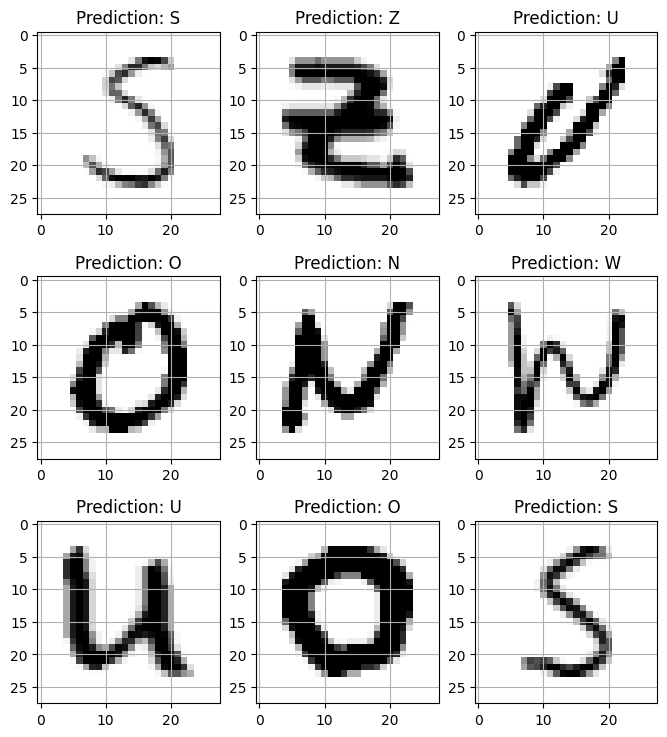

In [ ]:
# Now we will finally have the things to show on the graph we are getting 9 images from
# The train set
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
# To showing the 9 images we will loop though the data from test model and will predict the
# images on the basis of CNN model of keras/tensorflow.
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")

    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()
#Here we go below are the results

Choose an action:
1. Upload an image for prediction
2. Quit
Enter your choice (1/2): 1
Upload an image for prediction:


Saving 1.png to 1 (1).png
1/1 [==============================] - 0s 25ms/step


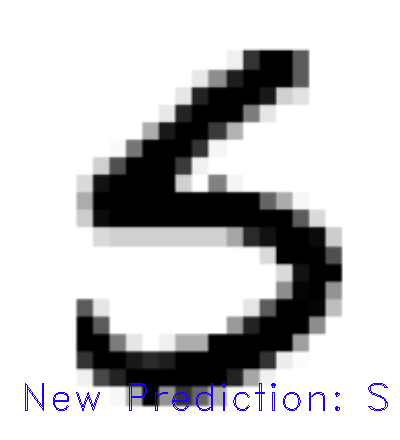

Choose an action:
1. Upload an image for prediction
2. Quit
Enter your choice (1/2): 2
Exiting...


In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Load your trained model and define the word_dict
# You should replace 'model' and 'word_dict' with your actual model and dictionary

def predict_alphabet(image_path):
    # Load the uploaded image
    img = cv2.imread(image_path)
    img_copy = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (400, 440))

    # Gaussian Method used for Blur checking
    img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
    img_final = cv2.resize(img_thresh, (28, 28))
    img_final = np.reshape(img_final, (1, 28, 28, 1))

    img_pred = word_dict[np.argmax(model.predict(img_final))]
    cv2.putText(img, "New Prediction: " + img_pred, (20, 410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color=(255, 0, 30))
    cv2_imshow(img)  # Use cv2_imshow() to display the image

exit_flag = False

while not exit_flag:
    # Prompt the user to choose an action
    print("Choose an action:")
    print("1. Upload an image for prediction")
    print("2. Quit")

    user_choice = input("Enter your choice (1/2): ")

    if user_choice == "1":
        try:
            # Prompt the user to upload an image
            print("Upload an image for prediction:")
            uploaded = files.upload()
            if not uploaded:
                print("No image uploaded. Please try again.")
                continue

            # Get the first uploaded image (you can modify this logic to handle multiple images)
            image_path = list(uploaded.keys())[0]

            # Perform the prediction
            predict_alphabet(image_path)
        except Exception as e:
            print(f"An error occurred: {str(e)}")
    elif user_choice == "2":
        exit_flag = True
        print("Exiting...")
    else:
        print("Invalid choice. Please enter '1' to upload an image or '2' to quit.")
